In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import scale

In [3]:
df=pd.read_csv('Trucks.csv')

In [4]:
df.head()

,Unnamed: 0,Freq,period,parked,light,collision
0,1,712,0,1,1,0
1,2,613,1,1,1,0
2,3,192,0,1,1,1
3,4,179,1,1,1,1
4,5,2557,0,0,1,0


In [5]:
df.tail()

,Unnamed: 0,Freq,period,parked,light,collision
19,20,39,1,1,0,1
20,21,579,0,0,0,0
21,22,494,1,0,0,0
22,23,1018,0,0,0,1
23,24,885,1,0,0,1


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,24.0,12.500000,7.071068,1.0,6.75,12.5,18.25,24.0
Freq,24.0,1448.916667,2794.132578,39.0,188.75,536.5,994.75,10749.0
period,24.0,0.500000,0.510754,0.0,0.00,0.5,1.00,1.0
parked,24.0,0.500000,0.510754,0.0,0.00,0.5,1.00,1.0
light,24.0,0.333333,0.481543,0.0,0.00,0.0,1.00,1.0
collision,24.0,0.500000,0.510754,0.0,0.00,0.5,1.00,1.0


In [7]:
df.dtypes

Unnamed: 0    int64
Freq          int64
period        int64
parked        int64
light         int64
collision     int64
dtype: object

In [8]:
df.isnull().sum()

Unnamed: 0    0
Freq          0
period        0
parked        0
light         0
collision     0
dtype: int64

In [9]:
df.shape

(24, 6)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Unnamed: 0  24 non-null     int64
 1   Freq        24 non-null     int64
 2   period      24 non-null     int64
 3   parked      24 non-null     int64
 4   light       24 non-null     int64
 5   collision   24 non-null     int64
dtypes: int64(6)
memory usage: 1.2 KB


In [12]:
df.head()

,Unnamed: 0,Freq,period,parked,light,collision
0,1,712,0,1,1,0
1,2,613,1,1,1,0
2,3,192,0,1,1,1
3,4,179,1,1,1,1
4,5,2557,0,0,1,0


In [13]:
x=df.drop('collision',axis=1)
y=df.pop('collision')
x=scale(x)

In [14]:
clf=LinearDiscriminantAnalysis()
model=clf.fit(x,y)
model

LinearDiscriminantAnalysis()

In [15]:
pred=model.predict(x)
df['prediction']=pred

In [16]:
df.corr()

,Unnamed: 0,Freq,period,parked,light,prediction
Unnamed: 0,1.000000,-0.260271,7.223151e-02,-2.889260e-01,-8.172063e-01,6.593051e-01
Freq,-0.260271,1.000000,-3.415223e-02,-4.230794e-01,5.025354e-01,2.970175e-01
period,0.072232,-0.034152,1.000000e+00,0.000000e+00,4.906539e-18,-1.876619e-17
parked,-0.288926,-0.423079,0.000000e+00,1.000000e+00,1.226635e-16,-1.690309e-01
light,-0.817206,0.502535,4.906539e-18,1.226635e-16,1.000000e+00,-2.390457e-01
prediction,0.659305,0.297018,-1.876619e-17,-1.690309e-01,-2.390457e-01,1.000000e+00


In [17]:
confusion_matrix(y,pred)

array([[8, 4],
       [6, 6]], dtype=int64)

In [ ]:
True Positive : 8
True Negative : 6
False Positive: 6
False Negative: 4


In [18]:
from sklearn.metrics import classification_report

In [19]:
print(classification_report(y,pred))

              precision    recall  f1-score   support

           0       0.57      0.67      0.62        12
           1       0.60      0.50      0.55        12

    accuracy                           0.58        24
   macro avg       0.59      0.58      0.58        24
weighted avg       0.59      0.58      0.58        24



In [20]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn import metrics

In [21]:
y_pred_proba = model.predict_proba(x)[::,1]

#calculate AUC of model
auc = metrics.roc_auc_score(y, y_pred_proba)


In [22]:
auc

0.7430555555555555

In [23]:
print(roc_curve)

<function roc_curve at 0x000001C3D26CBC10>


In [25]:
roc_curve

<function sklearn.metrics._ranking.roc_curve(y_true, y_score, *, pos_label=None, sample_weight=None, drop_intermediate=True)>

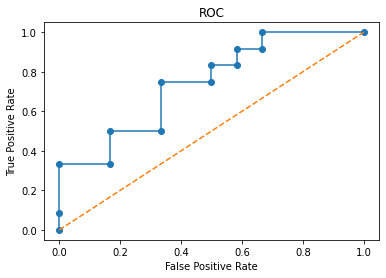

In [27]:
dt_fpr, dt_tpr,_=roc_curve(y,y_pred_proba)
plt.plot(dt_fpr,dt_tpr, marker='o', label='Decision Tree')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
